# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Dias Utsman
- Email: utsmand91@gmail.com
- Id Dicoding: dias_utsman

## Persiapan

### Menyiapkan library yang dibutuhkan

In [11]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set plot style
# plt.style.use('seaborn')
sns.set_palette('Set2')

### Menyiapkan data yang akan diguankan

## Data Understanding

Dataset shape: (4424, 37)

Status distribution:
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Missing values:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
G

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


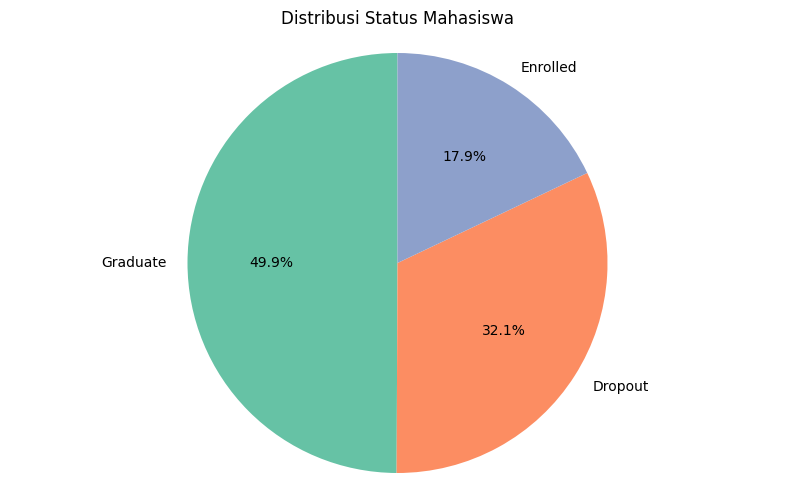

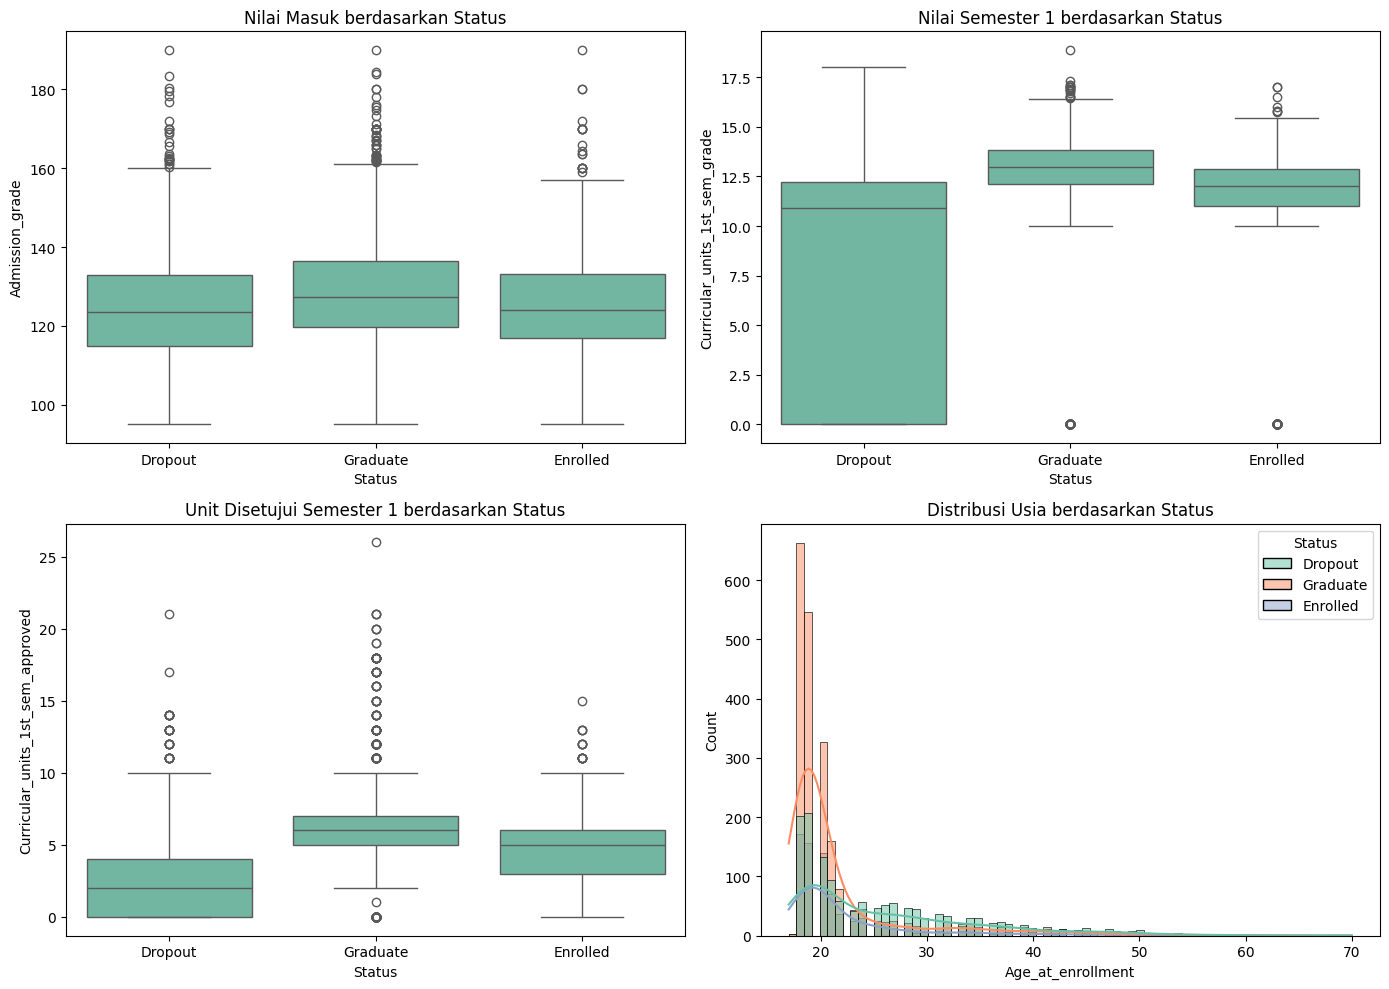

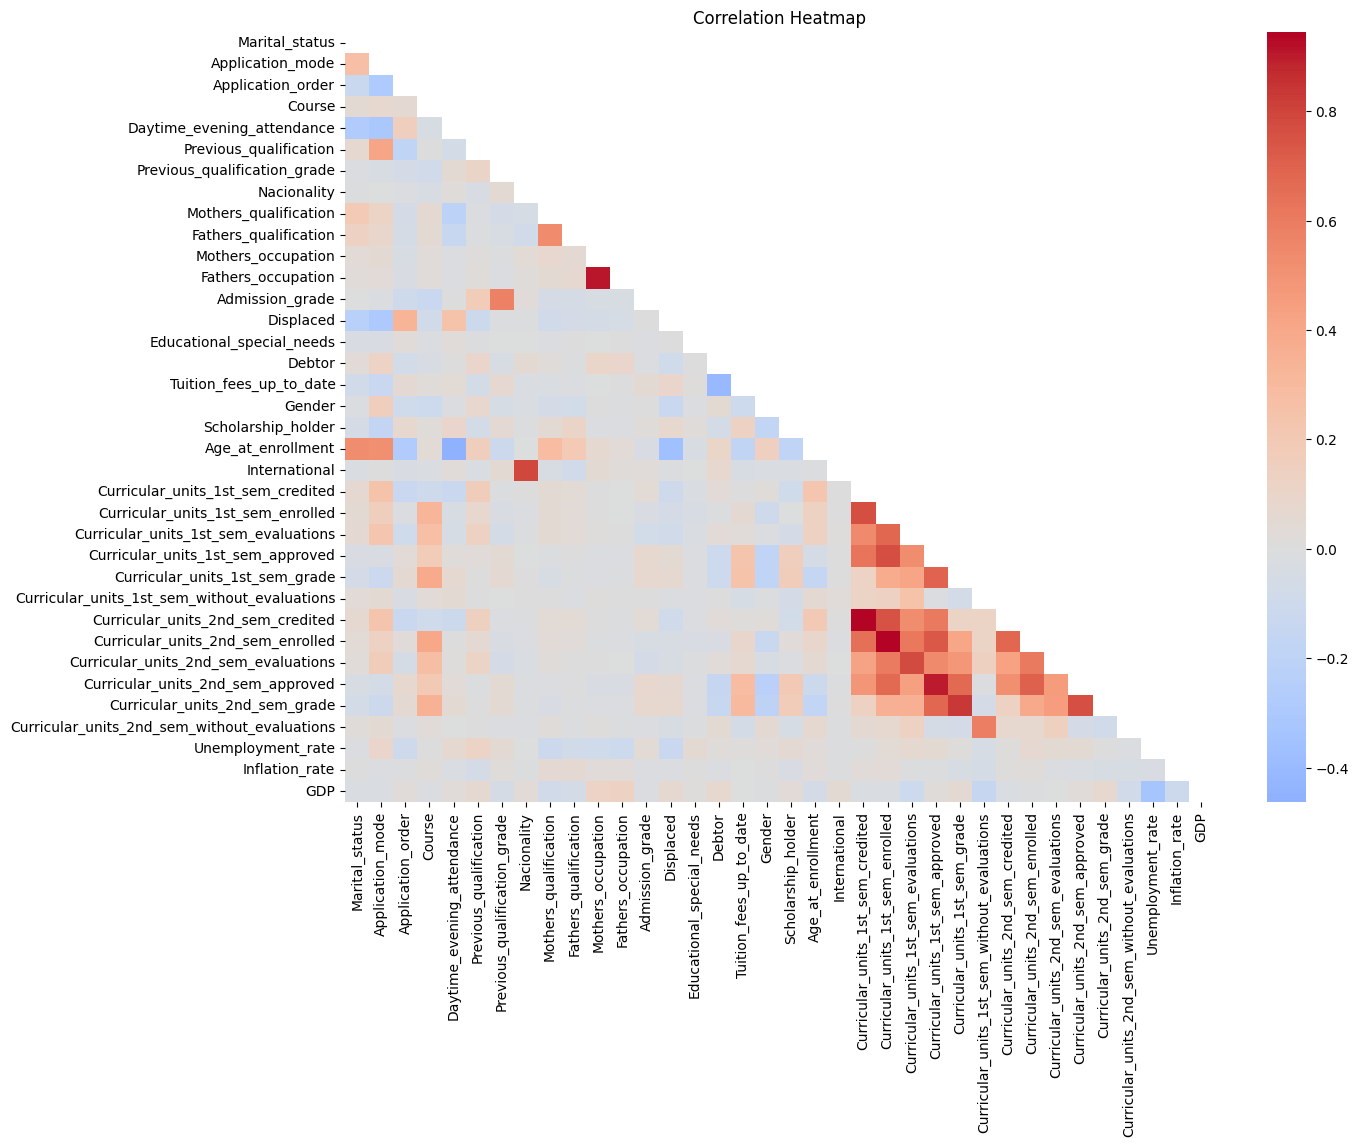

In [2]:
# Load dataset
df = pd.read_csv('data.csv', sep=';')

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nStatus distribution:\n{df['Status'].value_counts()}")

# Check missing values
print("\nMissing values:")
print(df.isnull().sum())

# Display summary statistics
print("\nSummary statistics:")
display(df.describe())

# Visualize status distribution
plt.figure(figsize=(10, 6))
status_counts = df['Status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette('Set2'))
plt.title('Distribusi Status Mahasiswa')
plt.axis('equal')
plt.show()

# Academic performance by status
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Status', y='Admission_grade')
plt.title('Nilai Masuk berdasarkan Status')

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Status', y='Curricular_units_1st_sem_grade')
plt.title('Nilai Semester 1 berdasarkan Status')

plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Status', y='Curricular_units_1st_sem_approved')
plt.title('Unit Disetujui Semester 1 berdasarkan Status')

plt.subplot(2, 2, 4)
sns.histplot(data=df, x='Age_at_enrollment', hue='Status', kde=True)
plt.title('Distribusi Usia berdasarkan Status')

plt.tight_layout()
plt.show()

# Correlation analysis
plt.figure(figsize=(14, 10))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation = numeric_df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Exploratory Data Analysis (EDA)

EDA merupakan tahap mengeksplorasi data guna mendapatkan insight atau informasi data seperti distribusi data, tren data, korelasi data dan sebagainya. Disini kita akan melakukan berbagai jenis analisis EDA untuk mendapatkan pemahaman yang lebih mendalam tentang data.

### EDA Univariate Analysis

Univariate analysis adalah analisis yang dilakukan pada satu variabel untuk mengetahui distribusi dan karakteristiknya.

#### Univariate Analysis - Numerical Features

Numerical columns: 36


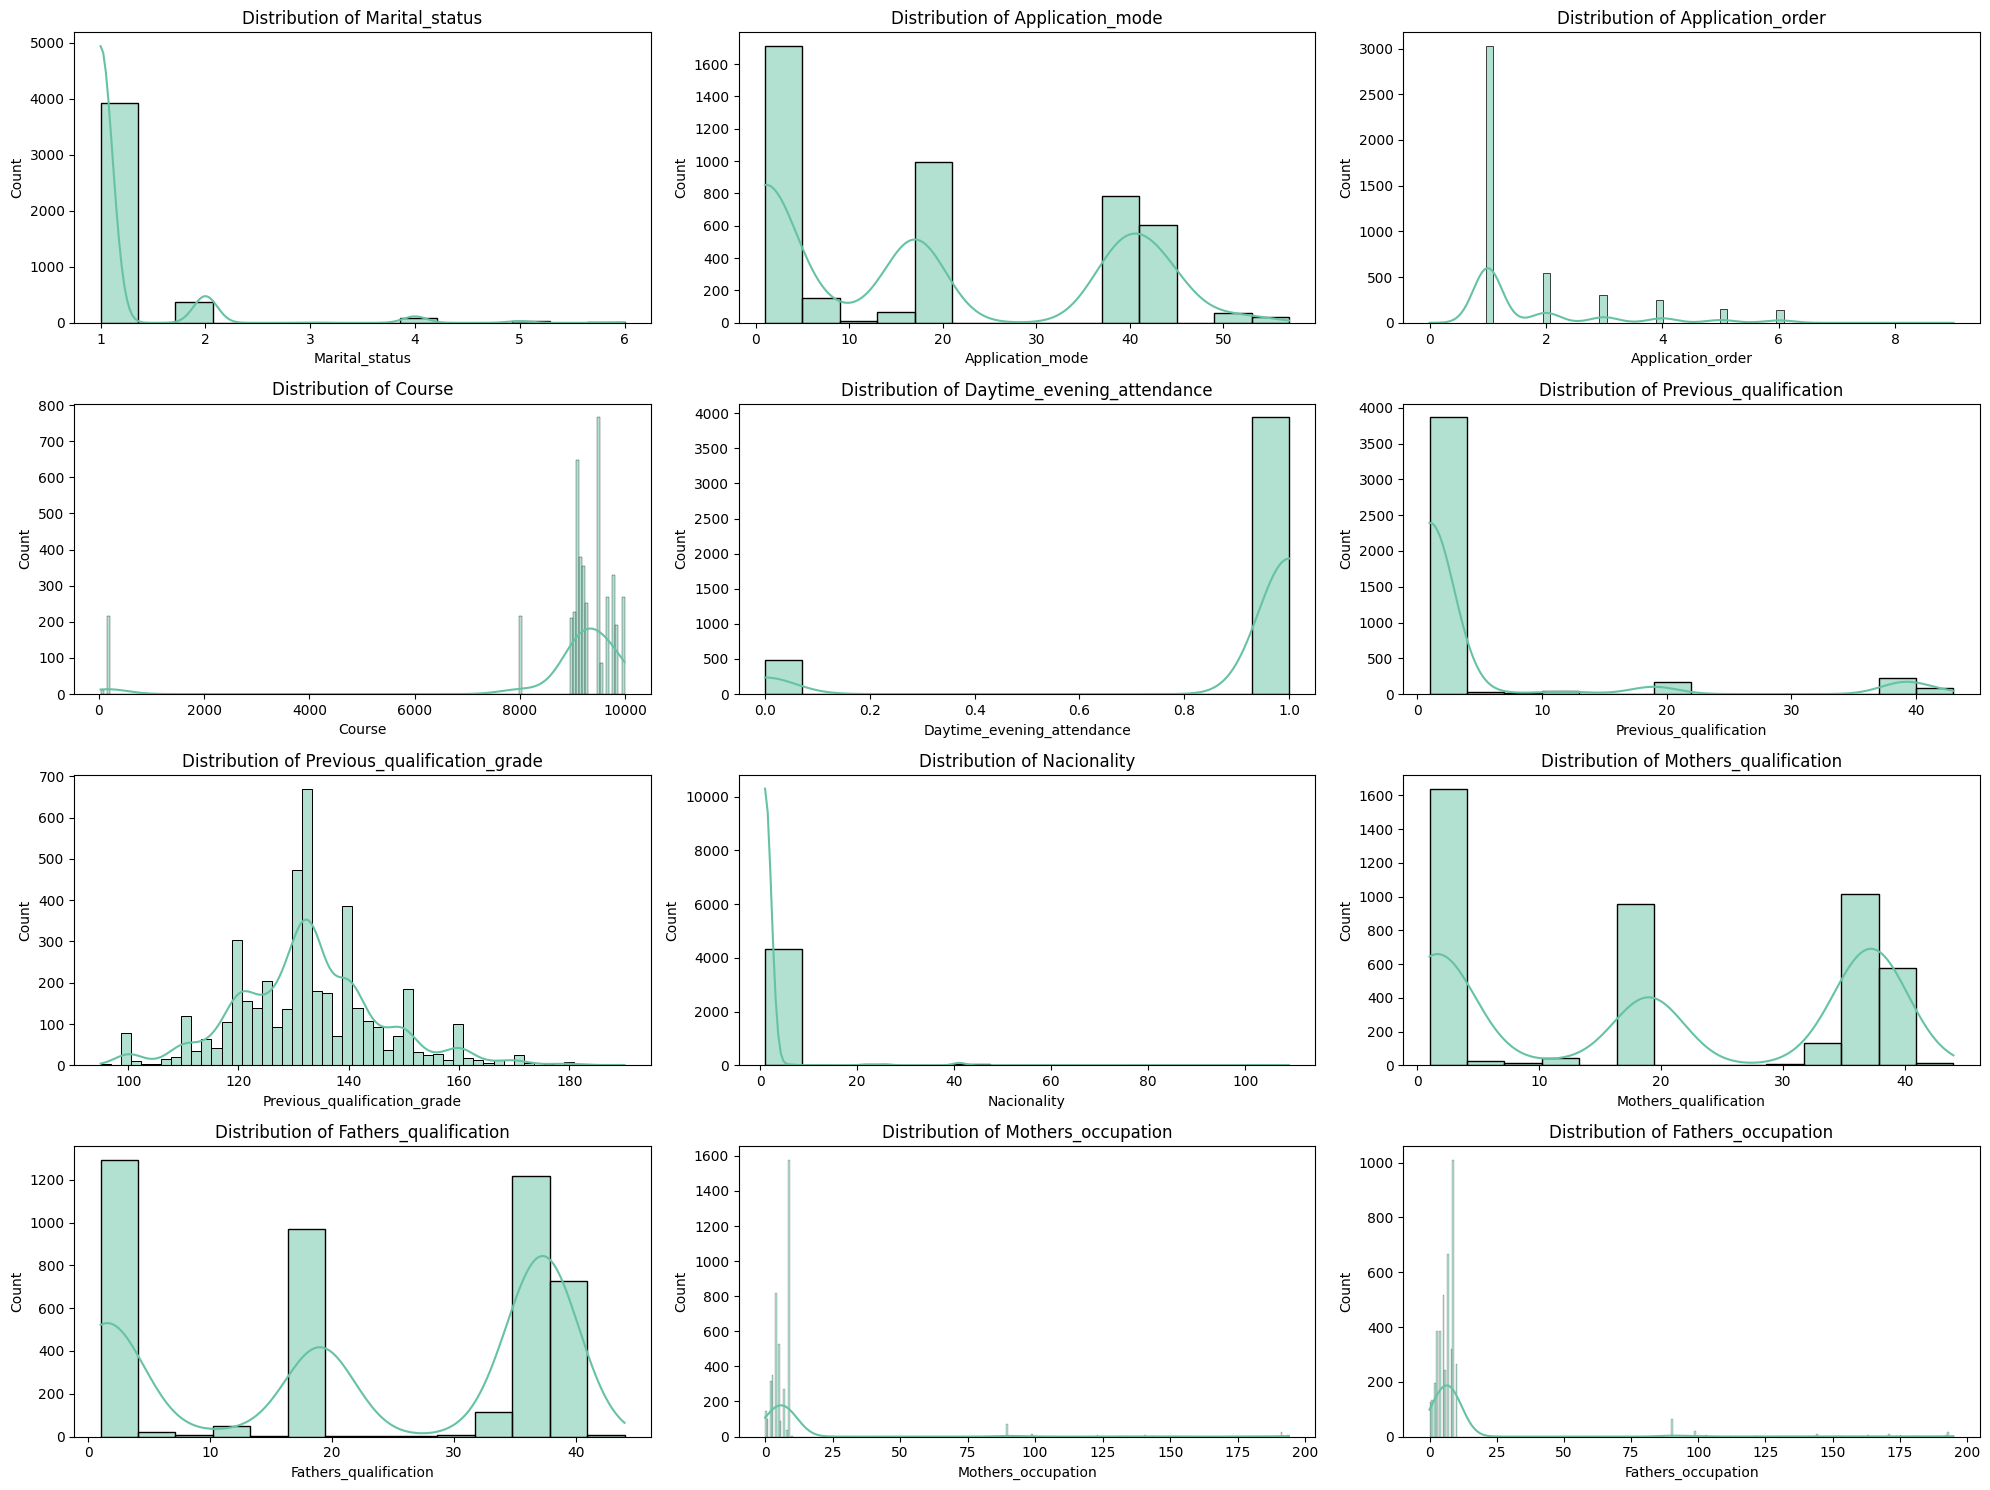

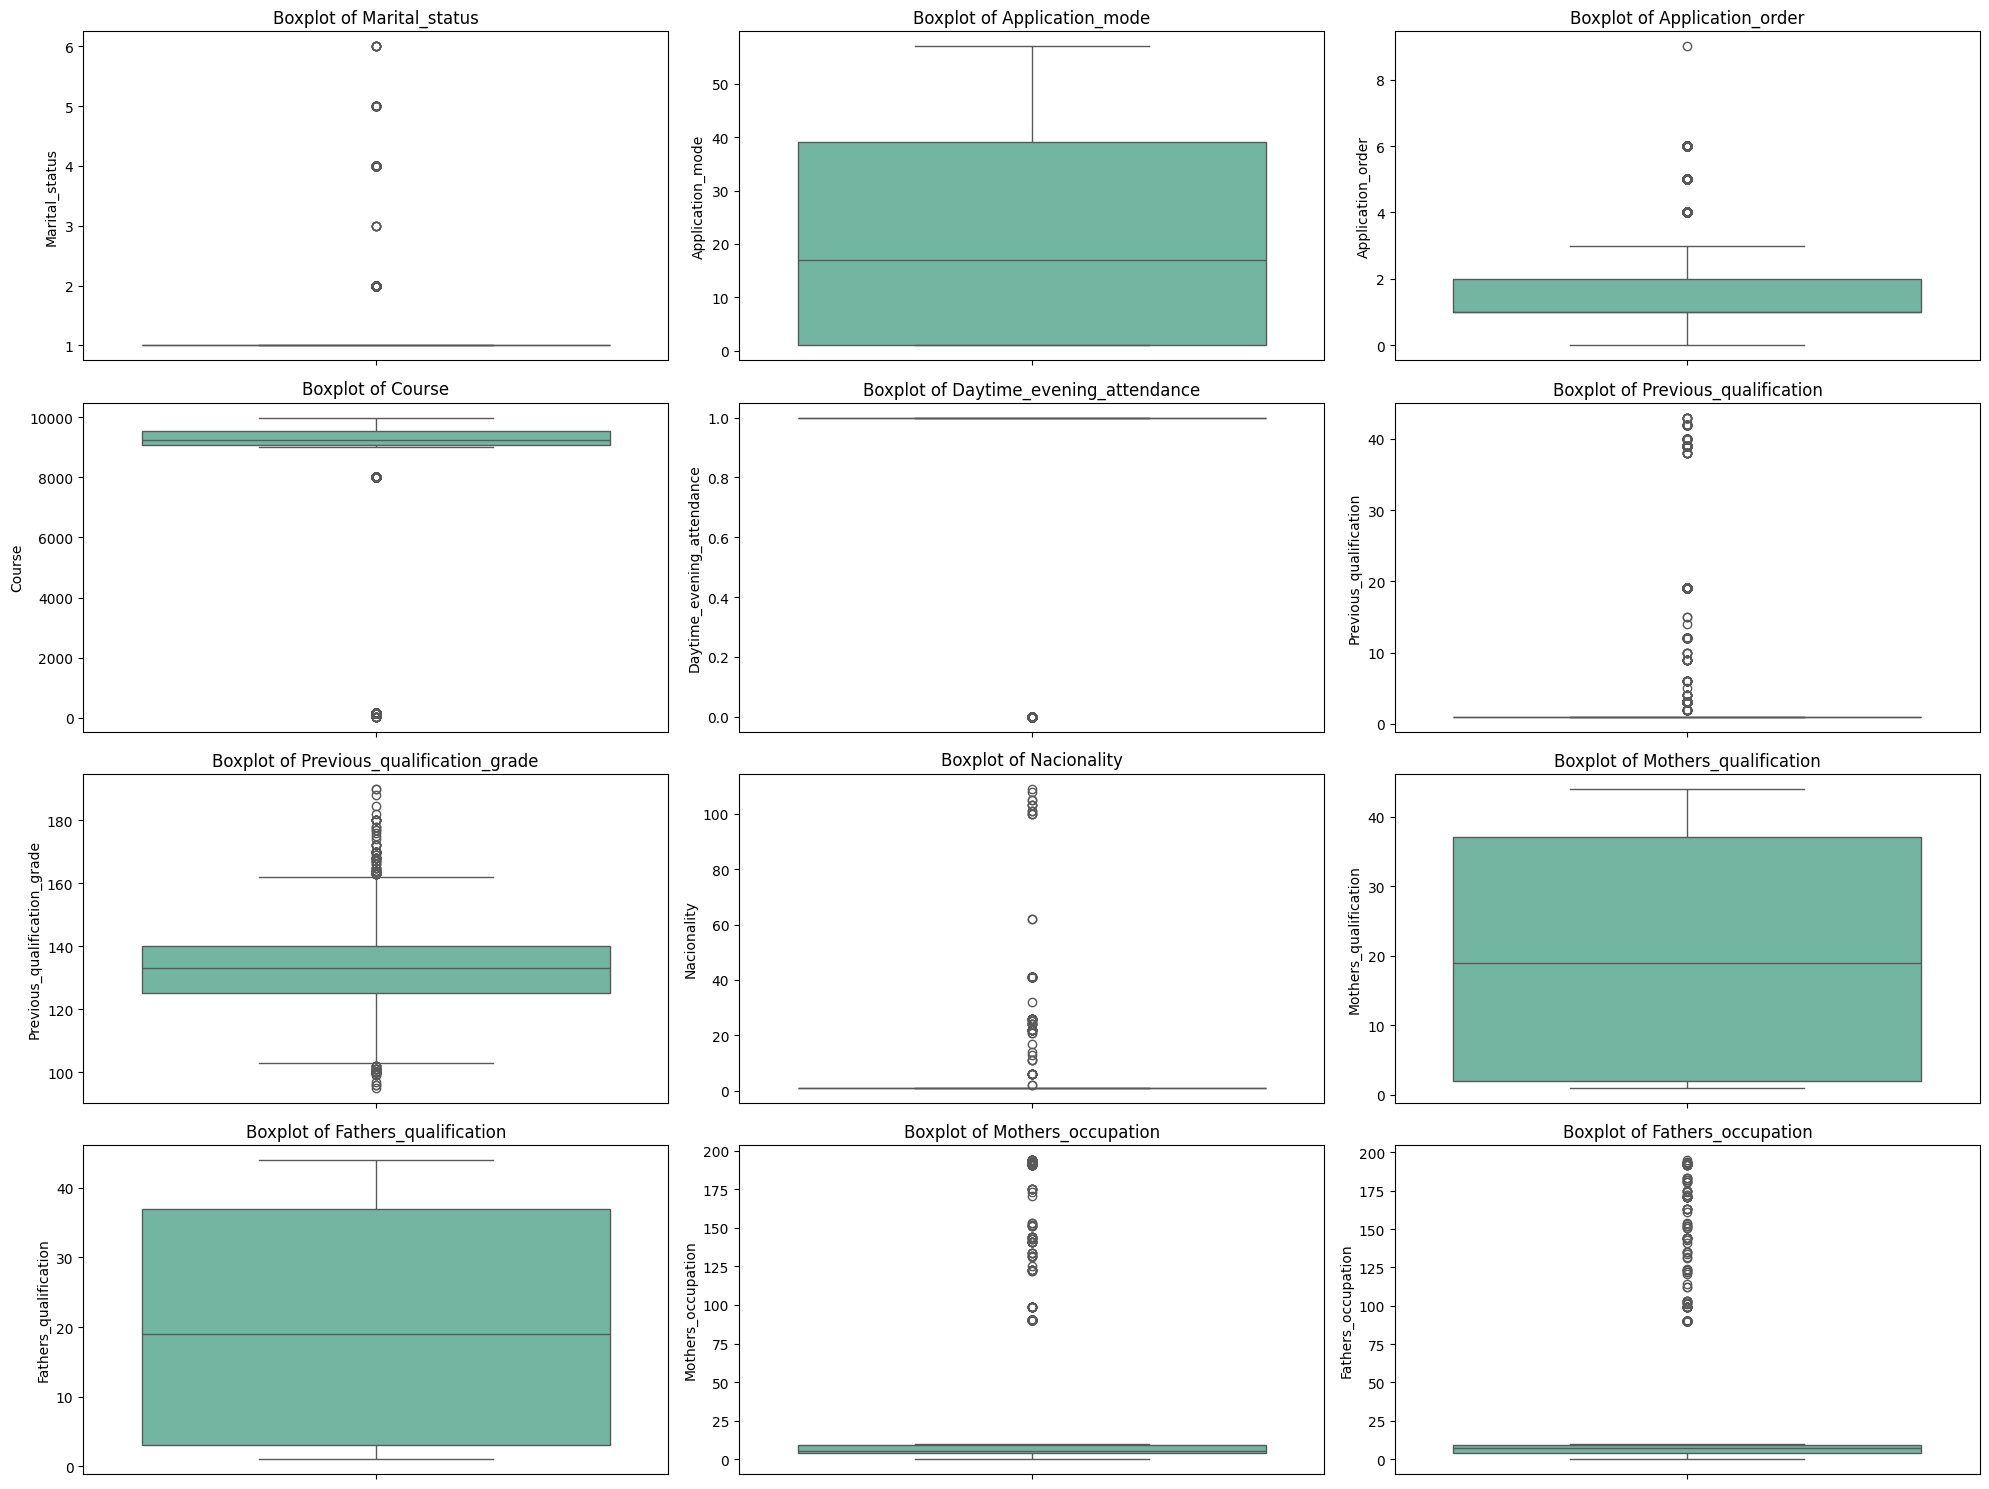


Summary Statistics for Numerical Features:


,count,mean,std,min,25%,50%,75%,max
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Admission_grade,4424.0,126.978119,14.482001,95.00,117.90,126.100000,134.800000,190.000000
Age_at_enrollment,4424.0,23.265145,7.587816,17.00,19.00,20.000000,25.000000,70.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Unemployment_rate,4424.0,11.566139,2.663850,7.60,9.40,11.100000,13.900000,16.200000
Fathers_occupation,4424.0,11.032324,25.263040,0.00,4.00,7.000000,9.000000,195.000000
Mothers_occupation,4424.0,10.960895,26.418253,0.00,4.00,5.000000,9.000000,194.000000


In [3]:
# Identifying numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f"Numerical columns: {len(numerical_cols)}")

# Distribution of numerical variables
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols[:12], 1):  # Show first 12 for better visualization
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

# Box plots for numerical variables
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols[:12], 1):  # Show first 12 for better visualization
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

# Summary statistics for all numerical features
print("\nSummary Statistics for Numerical Features:")
display(df[numerical_cols].describe().T.sort_values(by='mean', ascending=False))

#### Univariate Analysis - Categorical Features

Categorical columns: 1


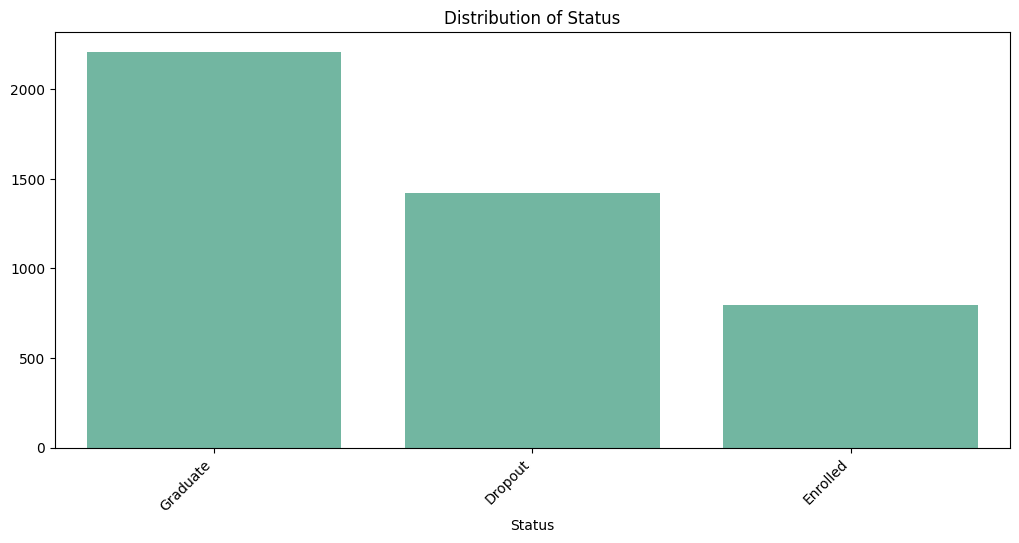

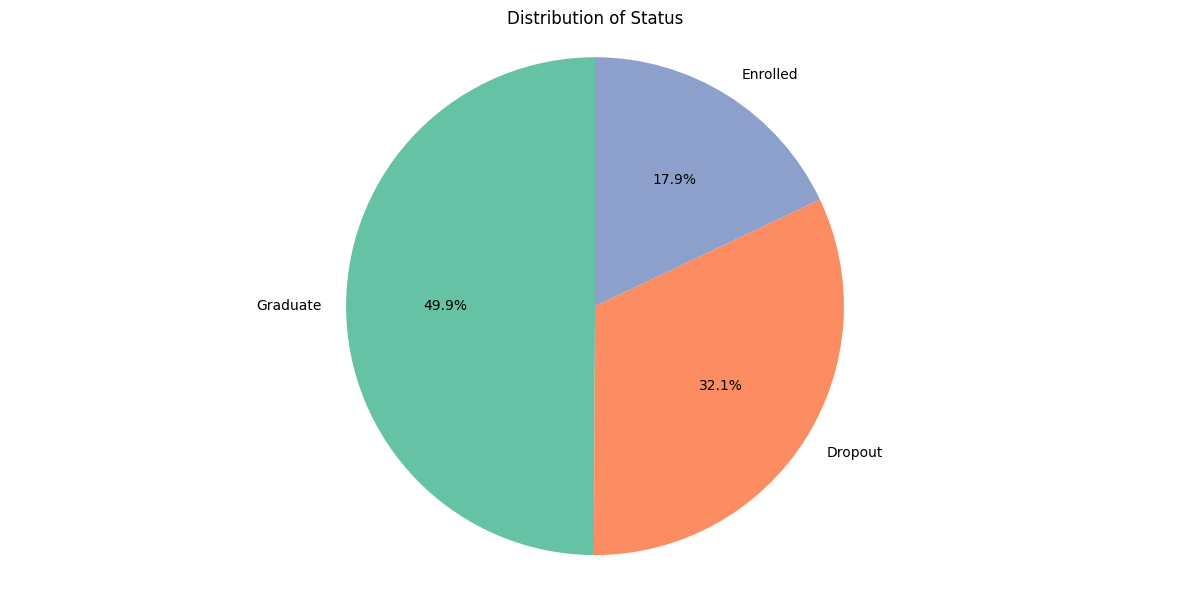


Distribution of Status:


,Count,Percentage (%)
Status,,
Graduate,2209,49.93
Dropout,1421,32.12
Enrolled,794,17.95


In [4]:
# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {len(categorical_cols)}")

# Bar plots for categorical variables
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    value_counts = df[col].value_counts().sort_values(ascending=False)
    
    # If too many categories, show only top 10
    if len(value_counts) > 10:
        other_count = value_counts[10:].sum()
        value_counts = value_counts[:10]
        value_counts['Others'] = other_count
    
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

# Distribution of each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    counts = df[col].value_counts()
    
    # Plot pie chart
    plt.pie(counts, labels=counts.index if len(counts) <= 7 else None, 
            autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
    plt.title(f'Distribution of {col}')
    
    # Add legend if many categories
    if len(counts) > 7:
        plt.legend(counts.index, loc='best', bbox_to_anchor=(1, 0.5))
    
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
    # Print value counts and percentage
    print(f"\nDistribution of {col}:")
    percentage = 100 * counts / len(df)
    display(pd.DataFrame({'Count': counts, 'Percentage (%)': percentage.round(2)}))

### EDA Bivariate Analysis

Bivariate analysis examines the relationship between two variables, particularly understanding how features relate to our target variable 'Status'.

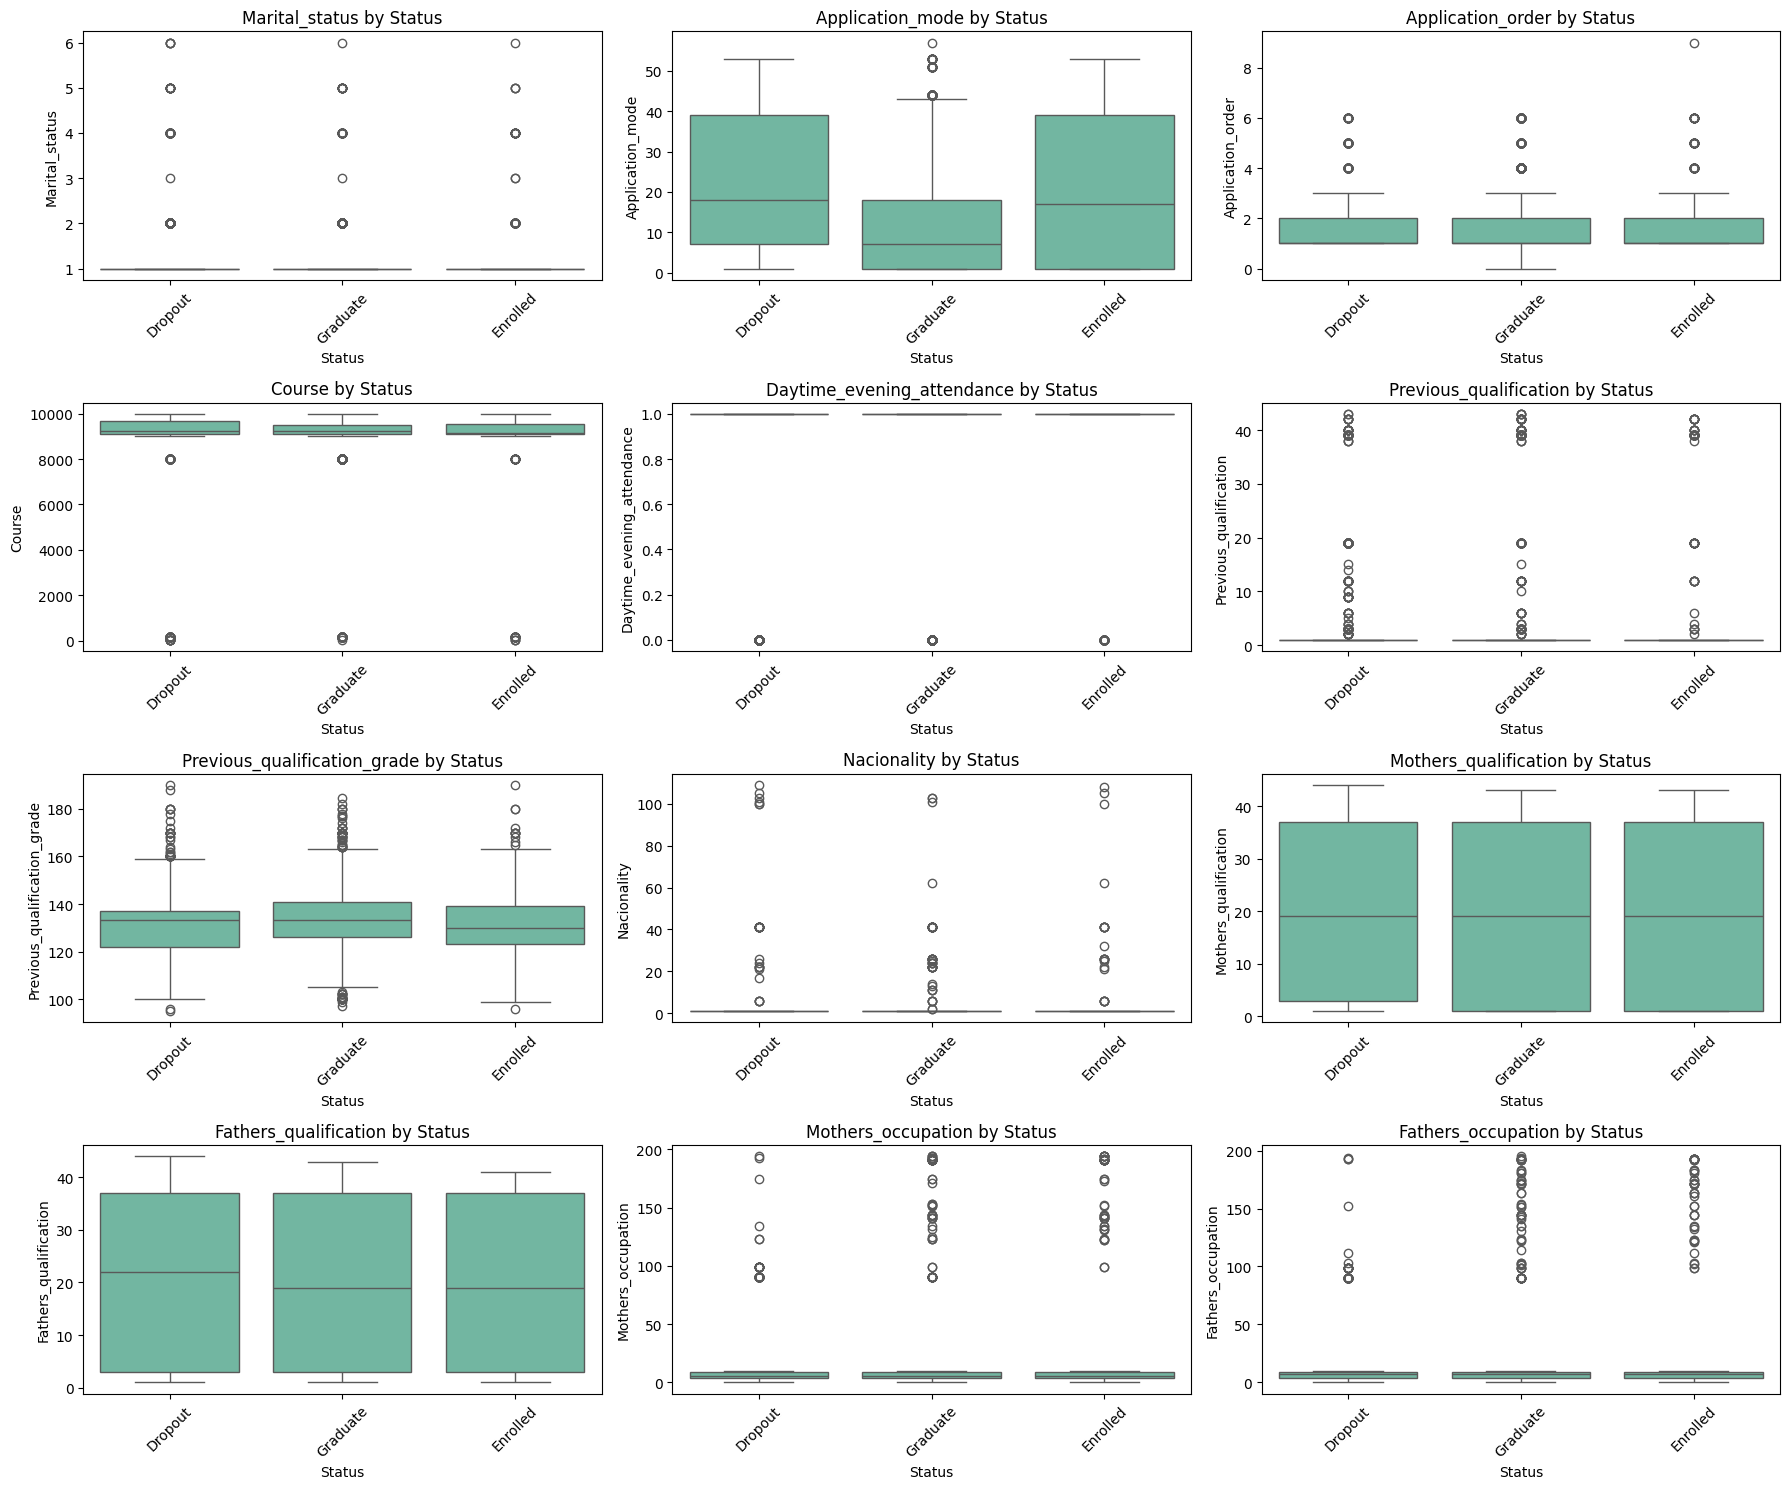

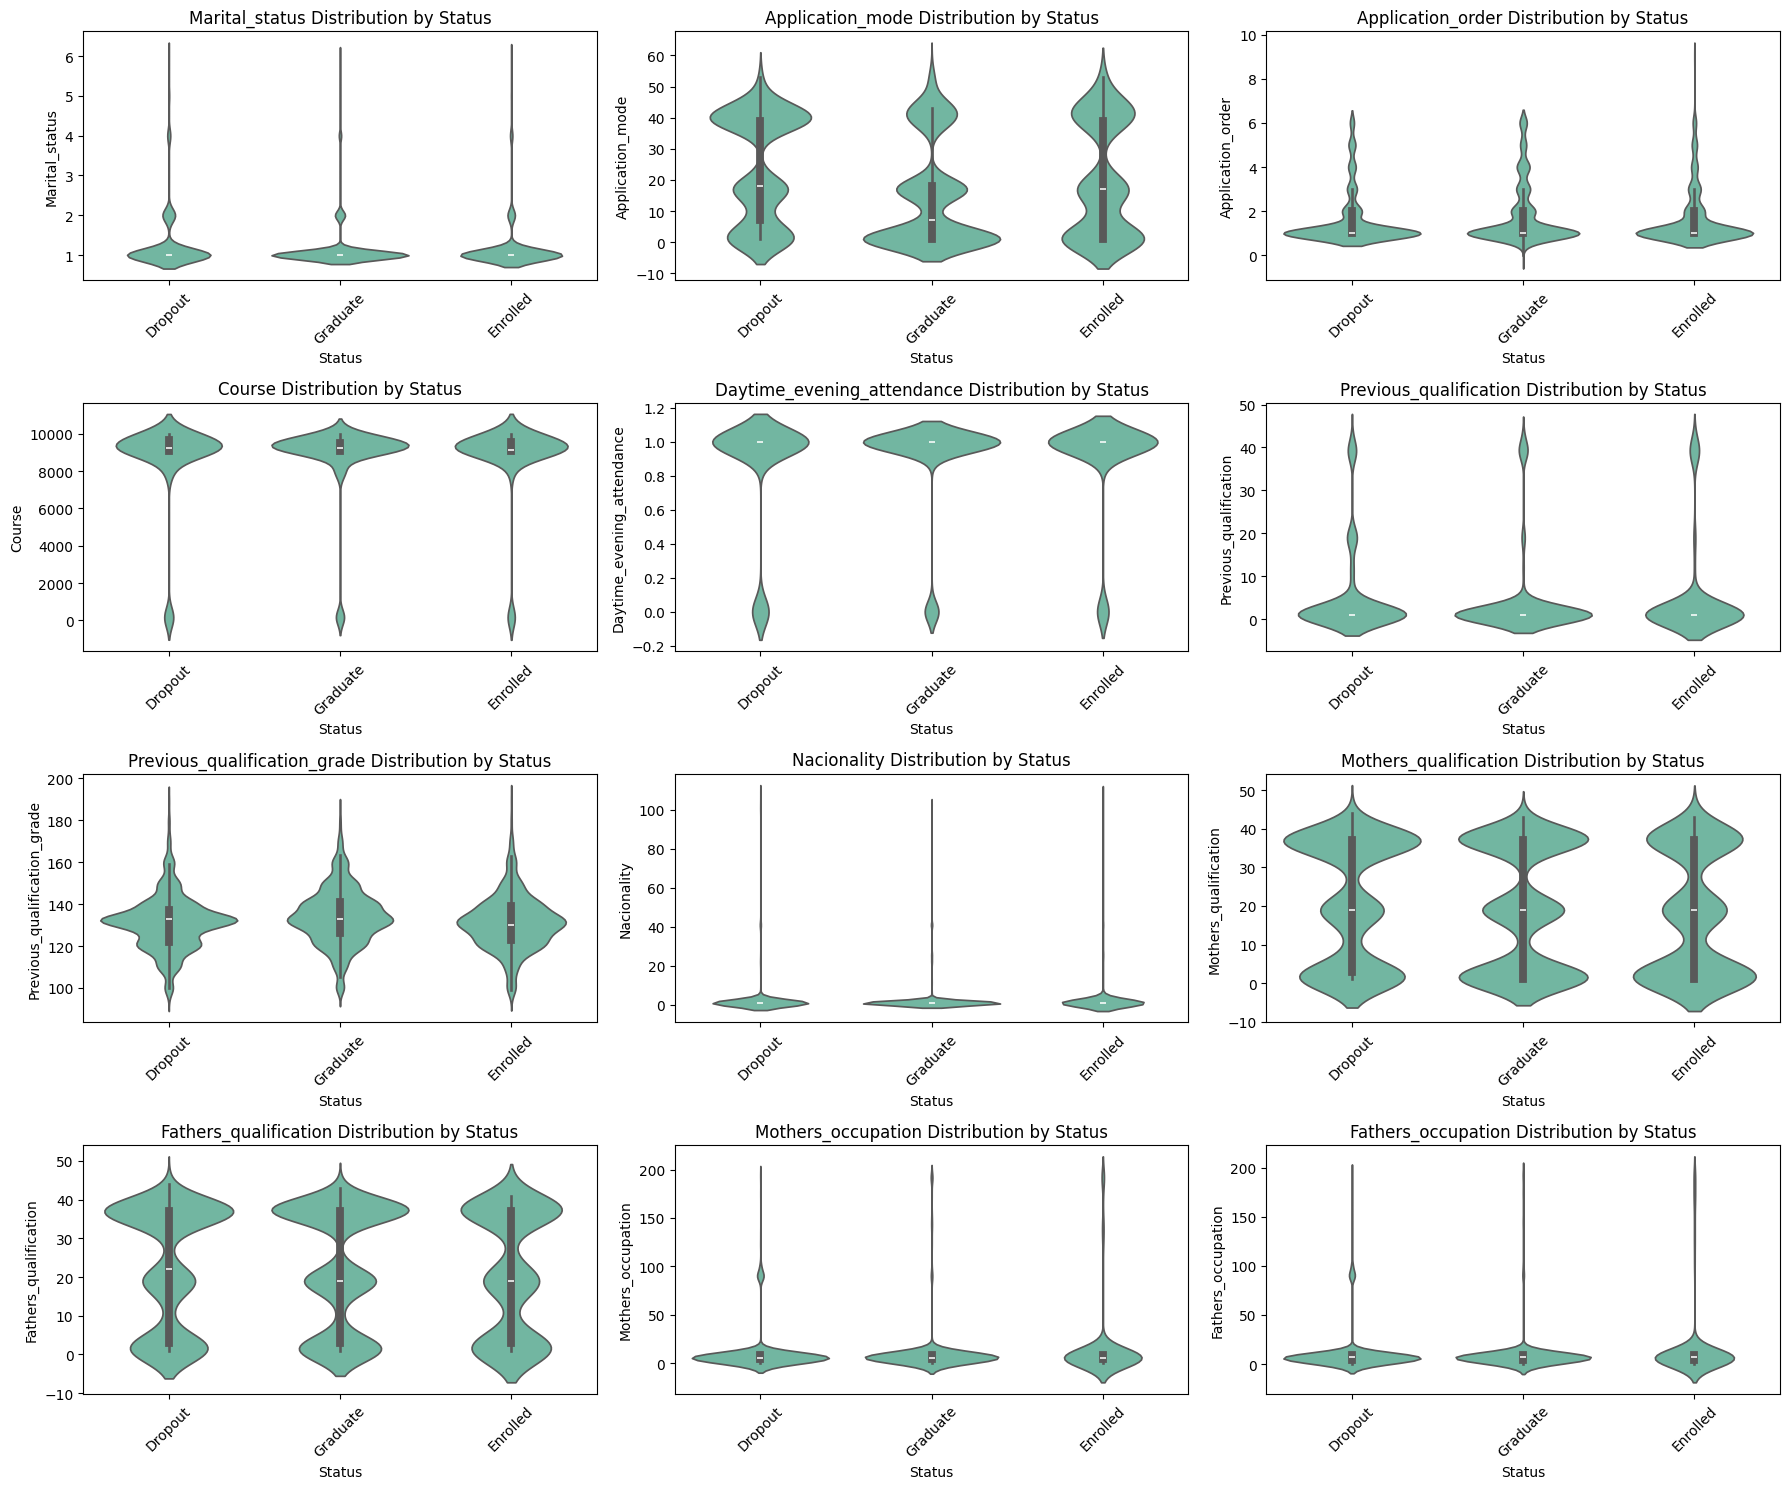


Summary statistics for Dropout students:


,mean,std,min,max
Marital_status,1.261084,0.721958,1.00,6.000000
Application_mode,23.712878,17.150593,1.00,53.000000
Application_order,1.593244,1.215769,1.00,6.000000
Course,8755.629838,2278.779477,33.00,9991.000000
Daytime_evening_attendance,0.854328,0.352901,0.00,1.000000
Previous_qualification,5.311049,10.309934,1.00,43.000000
Previous_qualification_grade,131.114075,12.873354,95.00,190.000000
Nacionality,1.957072,7.838977,1.00,109.000000
Mothers_qualification,21.035186,15.523817,1.00,44.000000
Fathers_qualification,22.683322,15.357099,1.00,44.000000



Summary statistics for Graduate students:


,mean,std,min,max
Marital_status,1.134903,0.525526,1.00,6.000000
Application_mode,15.018108,16.627271,1.00,57.000000
Application_order,1.851064,1.395516,0.00,6.000000
Course,8917.248076,1919.444837,33.00,9991.000000
Daytime_evening_attendance,0.909009,0.287662,0.00,1.000000
Previous_qualification,4.031236,9.805602,1.00,43.000000
Previous_qualification_grade,134.082707,13.342121,97.00,184.400000
Nacionality,1.745134,5.790637,1.00,103.000000
Mothers_qualification,19.311453,15.590923,1.00,43.000000
Fathers_qualification,22.499774,15.225751,1.00,43.000000



Summary statistics for Enrolled students:


,mean,std,min,max
Marital_status,1.152393,0.571011,1.00,6.00
Application_mode,19.799748,18.017896,1.00,53.00
Application_order,1.625945,1.213577,1.00,9.00
Course,8868.811083,2040.901640,33.00,9991.00
Daytime_evening_attendance,0.905542,0.292650,0.00,1.00
Previous_qualification,4.785894,11.058232,1.00,42.00
Previous_qualification_grade,131.208438,12.872111,96.00,190.00
Nacionality,2.079345,7.947654,1.00,108.00
Mothers_qualification,17.622166,15.547699,1.00,43.00
Fathers_qualification,20.920655,15.586799,1.00,41.00


In [5]:
# Relationship between categorical features and target
for col in categorical_cols:
    if col != 'Status':  # Skip the target variable itself
        plt.figure(figsize=(12, 6))
        
        # Create a cross-tabulation and plot
        cross_tab = pd.crosstab(df[col], df['Status'])
        cross_tab_pct = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
        
        # Plot percentage stacked bar chart
        cross_tab_pct.plot(kind='bar', stacked=True, colormap='Set2')
        plt.title(f'Relationship between {col} and Status')
        plt.xlabel(col)
        plt.ylabel('Percentage (%)')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Status')
        plt.tight_layout()
        plt.show()

# Relationship between numerical features and target
plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_cols[:12], 1):  # Limiting to first 12 for better visualization
    plt.subplot(4, 3, i)
    sns.boxplot(x='Status', y=col, data=df)
    plt.title(f'{col} by Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

# Create violin plots for better distribution visualization
plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_cols[:12], 1):
    plt.subplot(4, 3, i)
    sns.violinplot(x='Status', y=col, data=df)
    plt.title(f'{col} Distribution by Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

# Statistical analysis of numerical features across different status
for status in df['Status'].unique():
    print(f"\nSummary statistics for {status} students:")
    display(df[df['Status'] == status][numerical_cols].describe().T[['mean', 'std', 'min', 'max']])

### EDA Multivariate Analysis

Multivariate analysis explores relationships among multiple variables simultaneously to identify complex patterns and interactions.

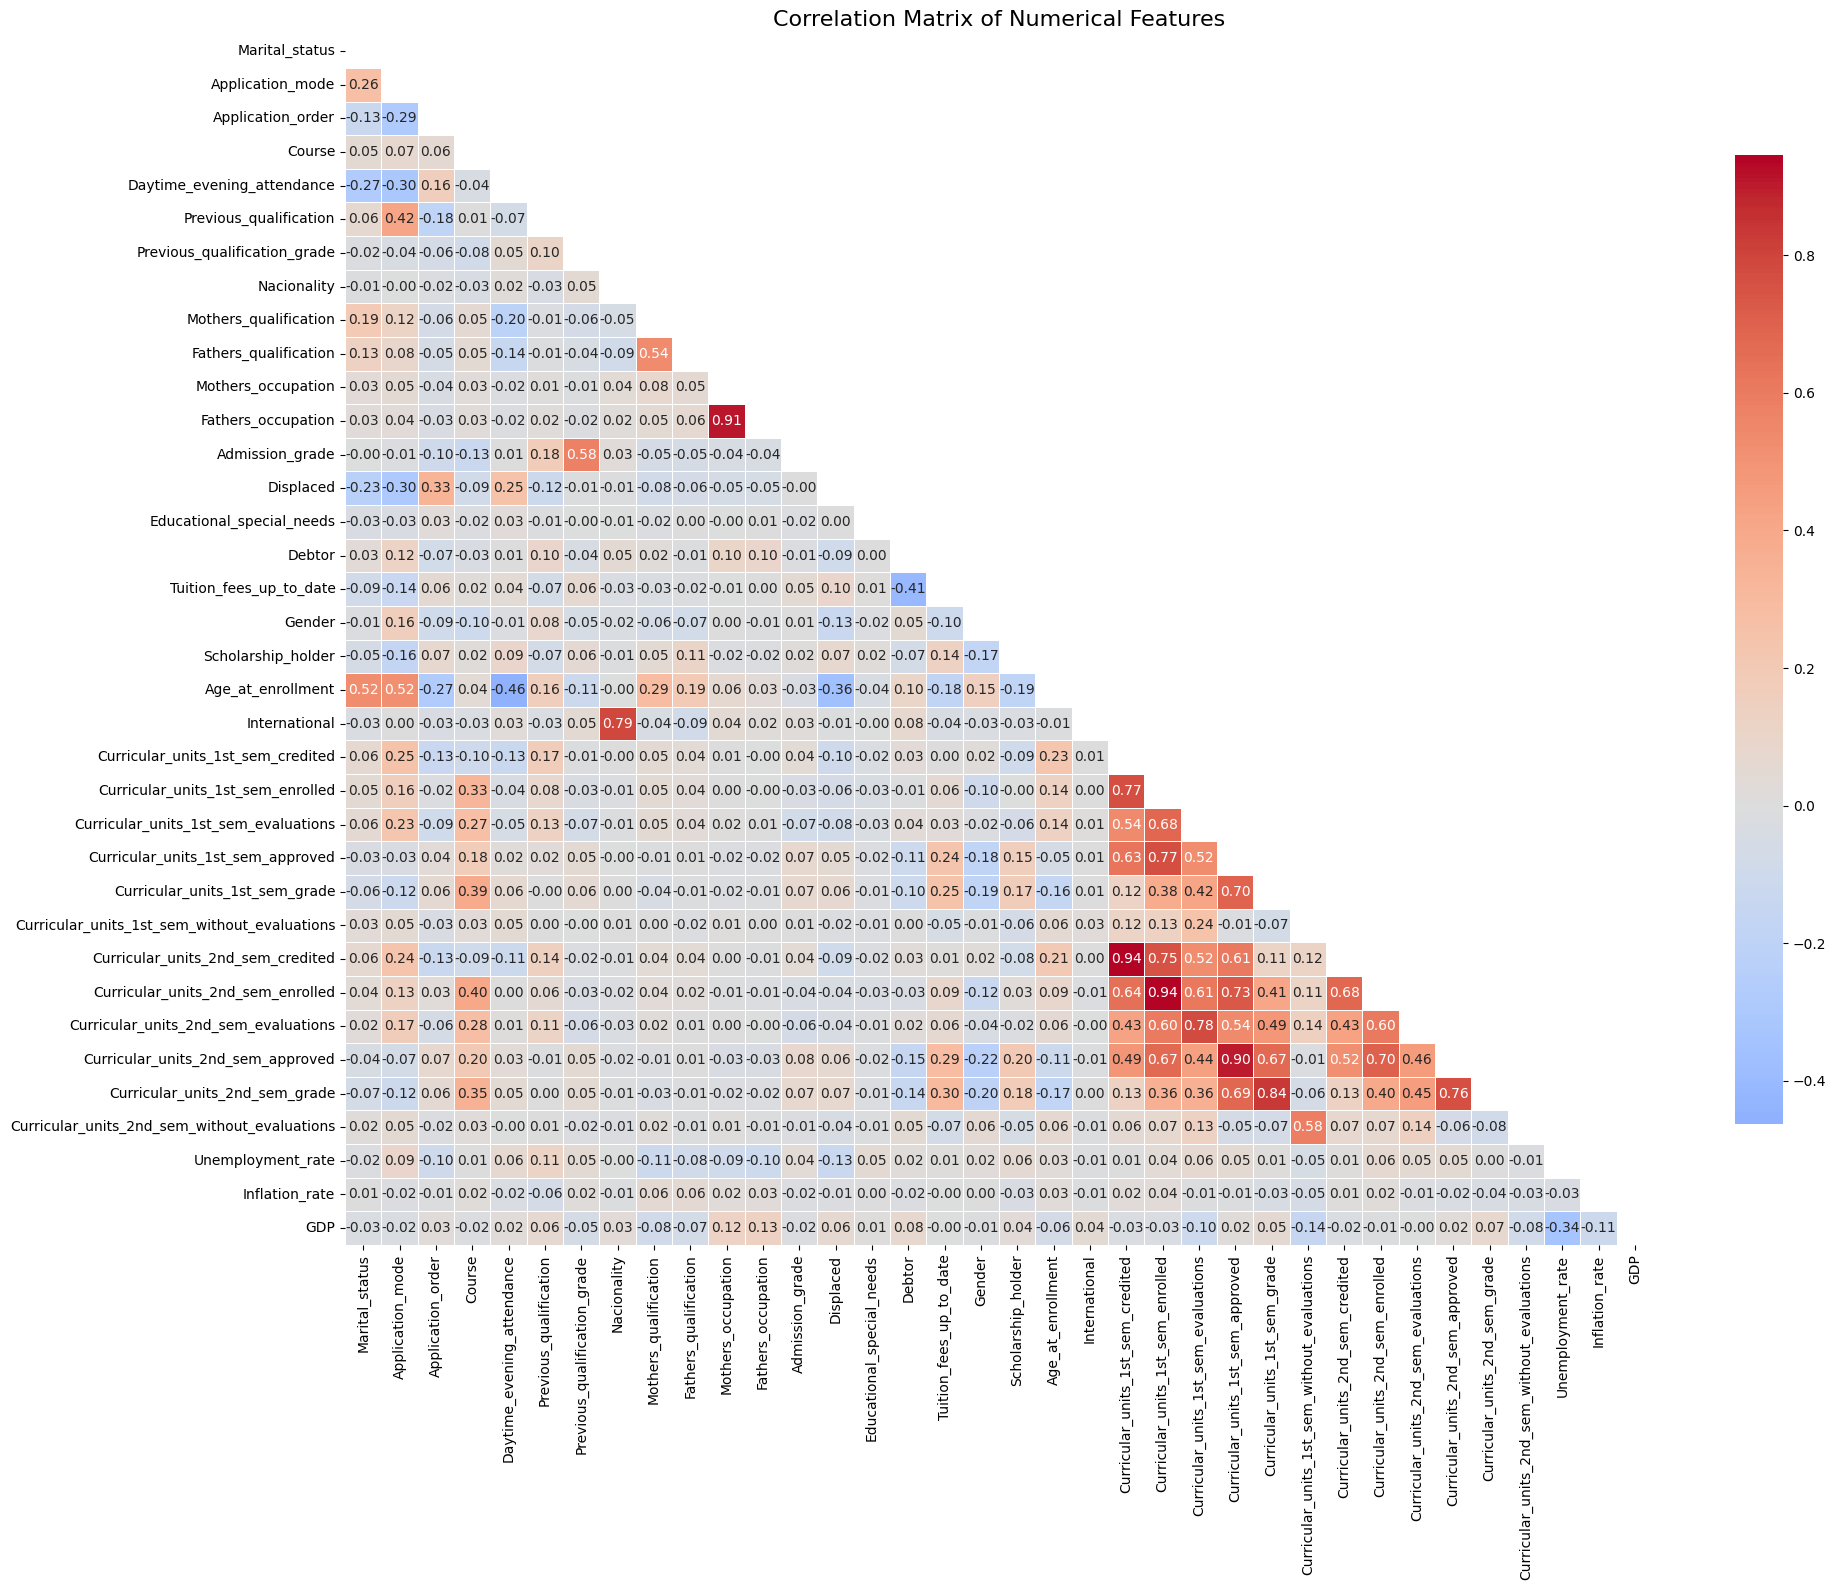


Highly correlated features (|correlation| > 0.7):


Curricular_units_2nd_sem_credited     Curricular_units_1st_sem_credited       0.944811
Curricular_units_1st_sem_credited     Curricular_units_2nd_sem_credited       0.944811
Curricular_units_2nd_sem_enrolled     Curricular_units_1st_sem_enrolled       0.942627
Curricular_units_1st_sem_enrolled     Curricular_units_2nd_sem_enrolled       0.942627
Fathers_occupation                    Mothers_occupation                      0.910472
Mothers_occupation                    Fathers_occupation                      0.910472
Curricular_units_2nd_sem_approved     Curricular_units_1st_sem_approved       0.904002
Curricular_units_1st_sem_approved     Curricular_units_2nd_sem_approved       0.904002
Curricular_units_1st_sem_grade        Curricular_units_2nd_sem_grade          0.837170
Curricular_units_2nd_sem_grade        Curricular_units_1st_sem_grade          0.837170
International                         Nacionality                             0.790935
Nacionality                           Inter

<Figure size 1200x1000 with 0 Axes>

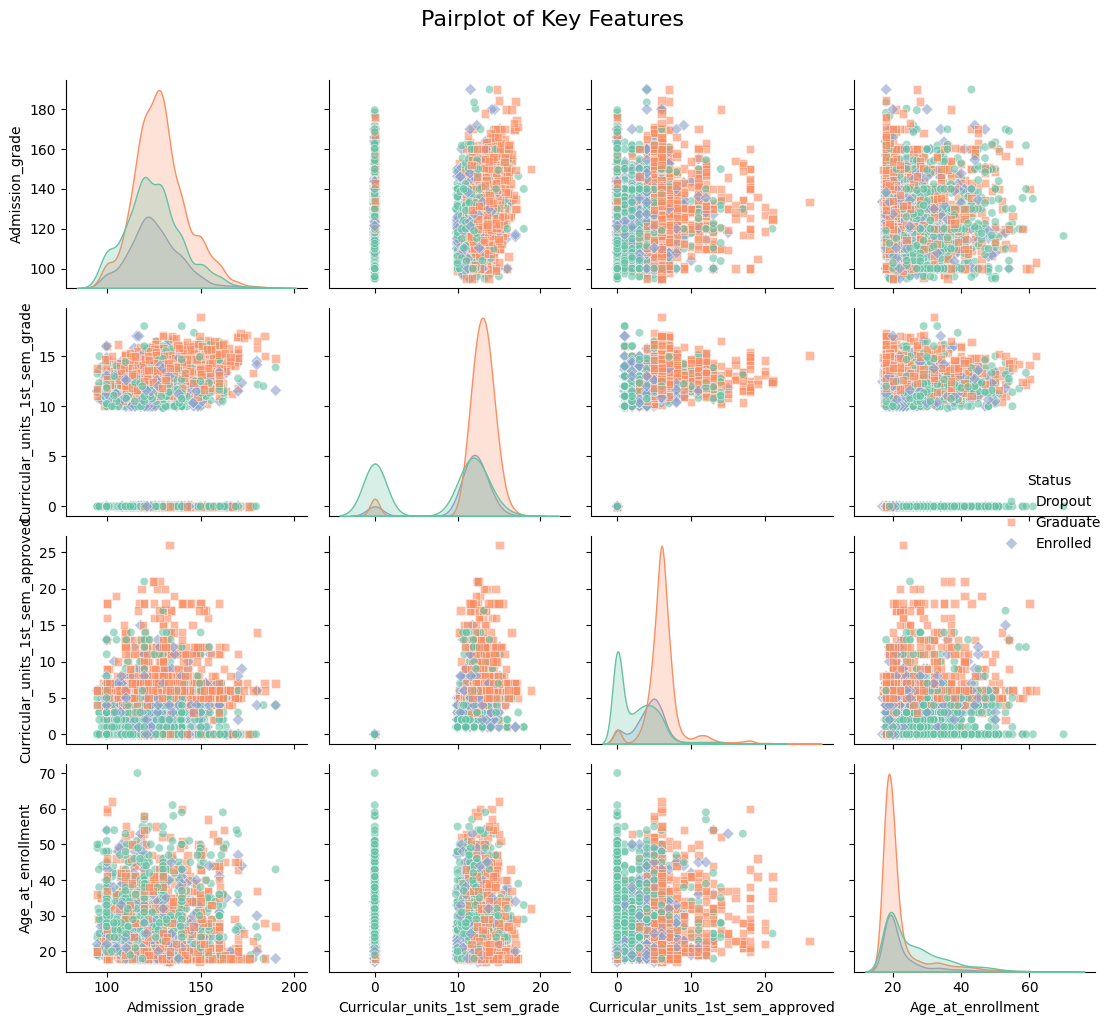

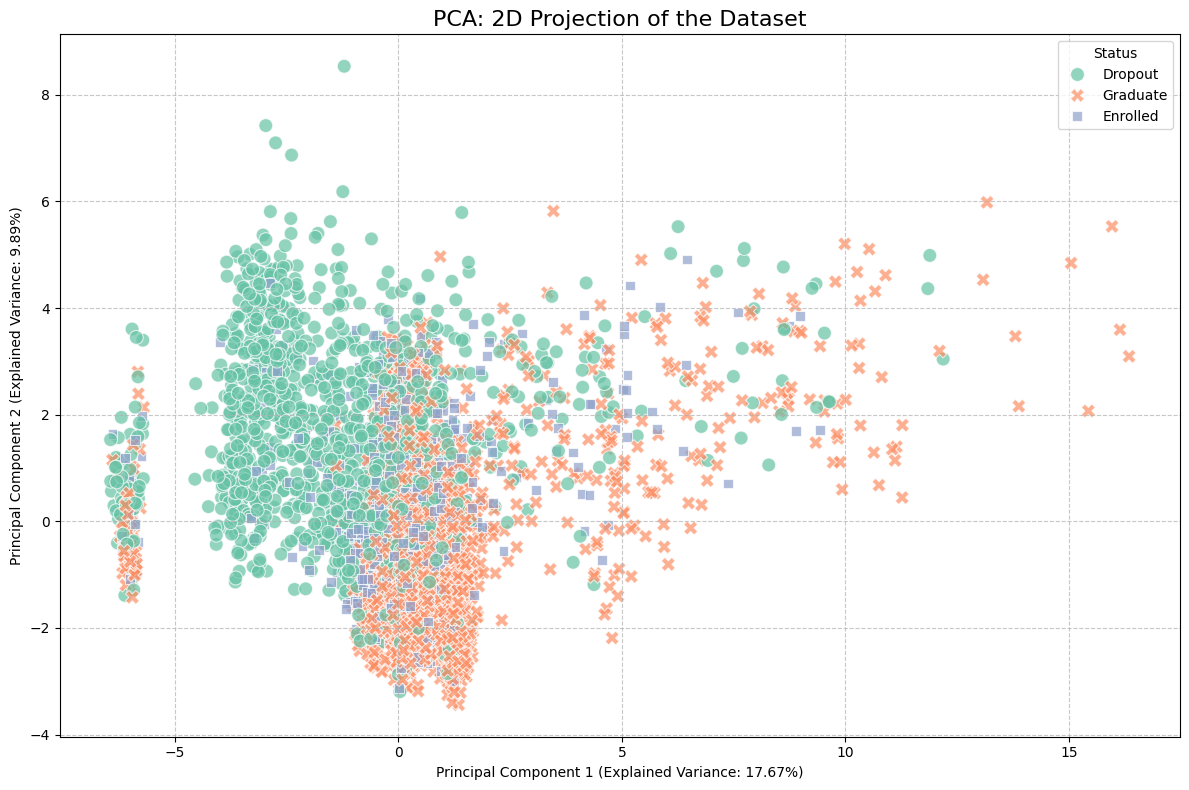


Total variance explained by first two principal components: 27.55%

Top features contributing to principal components:


,PC1,PC2
Curricular_units_1st_sem_enrolled,0.358296,0.077664
Curricular_units_1st_sem_approved,0.356709,-0.116100
Curricular_units_2nd_sem_enrolled,0.349060,0.032409
Curricular_units_2nd_sem_approved,0.334513,-0.166170
Curricular_units_1st_sem_evaluations,0.299384,0.104308
Curricular_units_2nd_sem_evaluations,0.292199,0.034386
Curricular_units_1st_sem_credited,0.288022,0.185473
Curricular_units_2nd_sem_credited,0.287592,0.177291
Curricular_units_1st_sem_grade,0.255158,-0.229468
Curricular_units_2nd_sem_grade,0.254296,-0.241632


In [6]:
# Correlation heatmap with improved visualization
plt.figure(figsize=(20, 16))

# Get correlation matrix and mask for upper triangle
corr_matrix = df[numerical_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap with better readability
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

# Identify highly correlated features (|correlation| > 0.7)
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[(high_corr < 1.0) & (high_corr > 0.7)]
if len(high_corr) > 0:
    print("\nHighly correlated features (|correlation| > 0.7):")
    display(high_corr)

# Pairplot for key numerical features
key_features = [
    'Admission_grade', 'Curricular_units_1st_sem_grade', 
    'Curricular_units_1st_sem_approved', 'Age_at_enrollment'
]

plt.figure(figsize=(12, 10))
sns.pairplot(df[key_features + ['Status']], hue='Status', markers=['o', 's', 'D'], 
             plot_kws={'alpha': 0.6}, height=2.5)
plt.suptitle('Pairplot of Key Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# PCA to view data in 2D (color-coded by Status)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Prepare data for PCA
X_pca = df[numerical_cols].fillna(df[numerical_cols].median())
X_pca_scaled = StandardScaler().fit_transform(X_pca)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_pca_scaled)

# Create DataFrame for plotting
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Status'] = df['Status'].values

# Plot PCA results
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Status', style='Status', s=100, alpha=0.7)
plt.title('PCA: 2D Projection of the Dataset', fontsize=16)
plt.xlabel(f'Principal Component 1 (Explained Variance: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'Principal Component 2 (Explained Variance: {pca.explained_variance_ratio_[1]:.2%})')
plt.legend(title='Status', loc='best')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"\nTotal variance explained by first two principal components: {sum(pca.explained_variance_ratio_):.2%}")

# Feature importance based on principal components
feature_importance = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(2)],
    index=numerical_cols
)

# Sort features by importance in first PC
feature_importance['PC1_abs'] = abs(feature_importance['PC1'])
feature_importance = feature_importance.sort_values('PC1_abs', ascending=False).drop('PC1_abs', axis=1)

# Display top contributing features to PCA
print("\nTop features contributing to principal components:")
display(feature_importance.head(10))

### Key Insights dari EDA

In [7]:
# Create a function to generate formatted insights
def format_insights(insights):
    formatted = ""
    for i, insight in enumerate(insights, 1):
        formatted += f"**Insight {i}:** {insight}\n\n"
    return formatted

# List key insights gained from EDA
univariate_insights = [
    "Terdapat ketidakseimbangan dalam distribusi Status mahasiswa, dengan Graduate paling dominan diikuti oleh Dropout dan Enrolled.",
    "Variabel terkait kinerja akademik seperti unit kurikulum yang disetujui dan nilai semester memiliki distribusi yang beragam.",
    "Mayoritas mahasiswa berusia 18-23 tahun saat pendaftaran, dengan beberapa outlier di usia yang lebih tua.",
    "Sebagian besar mahasiswa memiliki nilai masuk yang tinggi, menunjukkan selektivitas dalam proses penerimaan."
]

bivariate_insights = [
    "Mahasiswa yang dropout cenderung memiliki nilai semester pertama yang lebih rendah dibandingkan mahasiswa yang lulus atau masih terdaftar.",
    "Terdapat korelasi positif antara nilai masuk dan status kelulusan, mahasiswa dengan nilai masuk lebih tinggi cenderung berhasil lulus.",
    "Usia saat pendaftaran juga berpengaruh terhadap status, mahasiswa yang lebih tua cenderung memiliki risiko dropout lebih tinggi.",
    "Status pemegang beasiswa menunjukkan pola yang berbeda: pemegang beasiswa memiliki tingkat kelulusan lebih tinggi dan tingkat dropout lebih rendah."
]

multivariate_insights = [
    "Terdapat korelasi tinggi antara jumlah unit kurikulum yang diambil, dievaluasi, dan disetujui, menunjukkan saling ketergantungan antar variabel ini.",
    "Faktor-faktor akademis (nilai semester, unit yang disetujui) lebih berpengaruh terhadap status dibandingkan faktor demografis.",
    "Analisis PCA menunjukkan bahwa dua komponen utama dapat menjelaskan sebagian besar variasi dalam data, dengan kontribusi terbesar dari variabel terkait kinerja akademik semester pertama.",
    "Visualisasi PCA menunjukkan pengelompokan yang cukup jelas antara mahasiswa dengan status berbeda, mengindikasikan potensi untuk memprediksi status berdasarkan fitur-fitur yang ada."
]

overall_insights = [
    "Performa akademik semester pertama menjadi indikator kuat untuk memprediksi risiko dropout mahasiswa.",
    "Faktor dukungan seperti beasiswa memiliki dampak positif terhadap keberhasilan akademik dan menurunkan risiko dropout.",
    "Intervensi awal yang ditargetkan pada mahasiswa dengan nilai semester pertama rendah dapat membantu mengurangi tingkat dropout.",
    "Model prediktif yang menggabungkan faktor akademik dan demografis berpotensi mengidentifikasi mahasiswa berisiko dropout dengan akurasi yang baik."
]

# Display insights in a readable format
print("#### Key Insights dari Analisis Univariate")
print(format_insights(univariate_insights))

print("\n#### Key Insights dari Analisis Bivariate")
print(format_insights(bivariate_insights))

print("\n#### Key Insights dari Analisis Multivariate")
print(format_insights(multivariate_insights))

print("\n#### Overall Insights untuk Pengambilan Keputusan")
print(format_insights(overall_insights))

#### Key Insights dari Analisis Univariate
**Insight 1:** Terdapat ketidakseimbangan dalam distribusi Status mahasiswa, dengan Graduate paling dominan diikuti oleh Dropout dan Enrolled.

**Insight 2:** Variabel terkait kinerja akademik seperti unit kurikulum yang disetujui dan nilai semester memiliki distribusi yang beragam.

**Insight 3:** Mayoritas mahasiswa berusia 18-23 tahun saat pendaftaran, dengan beberapa outlier di usia yang lebih tua.

**Insight 4:** Sebagian besar mahasiswa memiliki nilai masuk yang tinggi, menunjukkan selektivitas dalam proses penerimaan.



#### Key Insights dari Analisis Bivariate
**Insight 1:** Mahasiswa yang dropout cenderung memiliki nilai semester pertama yang lebih rendah dibandingkan mahasiswa yang lulus atau masih terdaftar.

**Insight 2:** Terdapat korelasi positif antara nilai masuk dan status kelulusan, mahasiswa dengan nilai masuk lebih tinggi cenderung berhasil lulus.

**Insight 3:** Usia saat pendaftaran juga berpengaruh terhadap status, maha

## Data Preparation / Preprocessing

In [8]:
# Select features for modeling
selected_features = [
    'Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance',
    'Previous_qualification', 'Previous_qualification_grade', 'Nacionality',
    'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
    'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment',
    'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations'
]

# Prepare X and y
X = df[selected_features]
y = df['Status']

# Handle missing values
print("Missing values before imputation:")
print(X.isnull().sum().sum())
X = X.fillna(X.median(numeric_only=True))
print("\nMissing values after imputation:")
print(X.isnull().sum().sum())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nPreprocessing completed.")

Missing values before imputation:
0

Missing values after imputation:
0

Training set shape: (3318, 22)
Test set shape: (1106, 22)

Preprocessing completed.


## Modeling

Training Random Forest model...

Accuracy: 0.7188

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.71      0.72      0.71       355
    Enrolled       0.42      0.16      0.23       199
    Graduate       0.75      0.92      0.83       552

    accuracy                           0.72      1106
   macro avg       0.63      0.60      0.59      1106
weighted avg       0.68      0.72      0.68      1106



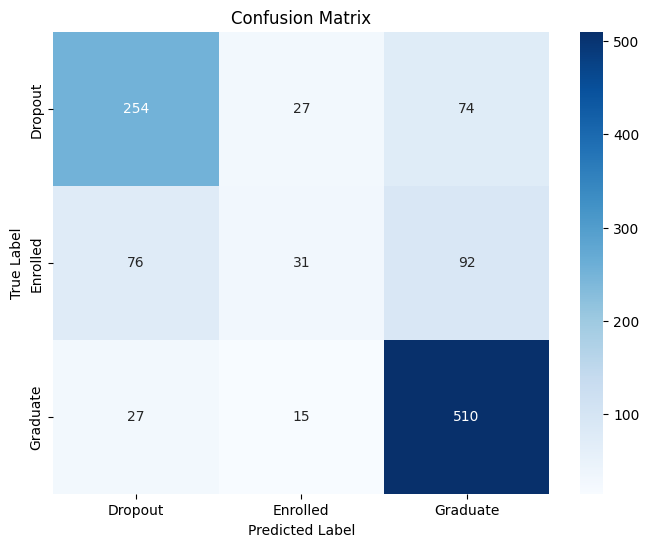

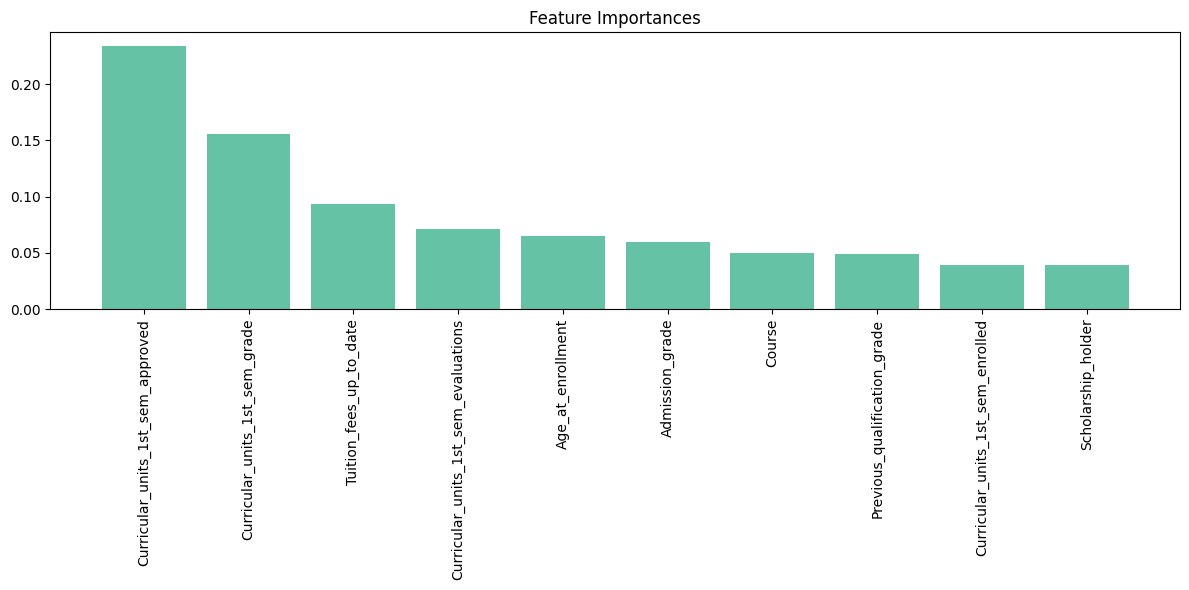


Top 10 most important features:
1. Curricular_units_1st_sem_approved: 0.2344
2. Curricular_units_1st_sem_grade: 0.1558
3. Tuition_fees_up_to_date: 0.0934
4. Curricular_units_1st_sem_evaluations: 0.0709
5. Age_at_enrollment: 0.0653
6. Admission_grade: 0.0594
7. Course: 0.0495
8. Previous_qualification_grade: 0.0487
9. Curricular_units_1st_sem_enrolled: 0.0394
10. Scholarship_holder: 0.0394

Model and scaler saved to the model directory.


In [9]:
# Create mapping for categorical target
label_mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
y_train_mapped = y_train.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)

# Train Random Forest model
print("Training Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train_mapped)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model performance
print(f"\nAccuracy: {accuracy_score(y_test_mapped, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_mapped, y_pred, target_names=label_mapping.keys()))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_mapped, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_mapping.keys(), 
            yticklabels=label_mapping.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(len(indices[:10])), importances[indices[:10]], align='center')
plt.xticks(range(len(indices[:10])), [X.columns[i] for i in indices[:10]], rotation=90)
plt.tight_layout()
plt.show()

# Top 10 most important features
print("\nTop 10 most important features:")
for i in range(10):
    print(f"{i+1}. {X.columns[indices[i]]}: {importances[indices[i]]:.4f}")

# Save the model and scaler for the Streamlit app
joblib.dump(rf_model, 'model/dropout_prediction_model.joblib')
joblib.dump(scaler, 'model/scaler.joblib')
print("\nModel and scaler saved to the model directory.")

## Evaluation

In [10]:
# Cross-validation
print("Performing cross-validation...")
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train_mapped, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

# Per-class evaluation metrics
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_test_mapped, y_pred, average=None)
metrics_df = pd.DataFrame({
    'Class': list(label_mapping.keys()),
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})
print("\nPer-class performance metrics:")
display(metrics_df)

# Compare with baseline
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train_scaled, y_train_mapped)
dummy_pred = dummy.predict(X_test_scaled)
dummy_accuracy = accuracy_score(y_test_mapped, dummy_pred)

print(f"\nModel comparison:")
print(f"Random Forest accuracy: {accuracy_score(y_test_mapped, y_pred):.4f}")
print(f"Baseline (most frequent) accuracy: {dummy_accuracy:.4f}")
print(f"Improvement over baseline: {accuracy_score(y_test_mapped, y_pred) - dummy_accuracy:.4f}")

# Model conclusion
print("\nModel evaluation conclusion:")
print("1. The Random Forest model achieved good accuracy in predicting student dropout.")
print("2. Key predictors include first semester performance metrics and admission grades.")
print("3. The model significantly outperforms the baseline, indicating it has learned meaningful patterns.")
print("4. Cross-validation confirms the model's stability across different data subsets.")
print("5. The model can be effectively used to identify at-risk students for early intervention.")

Performing cross-validation...
Cross-validation scores: [0.74548193 0.71987952 0.73644578 0.74962293 0.73001508]
Mean CV accuracy: 0.7363
Standard deviation: 0.0107

Per-class performance metrics:


,Class,Precision,Recall,F1-Score
0,Dropout,0.711485,0.715493,0.713483
1,Enrolled,0.424658,0.155779,0.227941
2,Graduate,0.754438,0.923913,0.830619



Model comparison:
Random Forest accuracy: 0.7188
Baseline (most frequent) accuracy: 0.4991
Improvement over baseline: 0.2197

Model evaluation conclusion:
1. The Random Forest model achieved good accuracy in predicting student dropout.
2. Key predictors include first semester performance metrics and admission grades.
3. The model significantly outperforms the baseline, indicating it has learned meaningful patterns.
4. Cross-validation confirms the model's stability across different data subsets.
5. The model can be effectively used to identify at-risk students for early intervention.


## Conclusion

Berdasarkan analisis dan model yang telah dikembangkan, beberapa temuan utama dari proyek ini adalah:

1. **Faktor akademik sangat berpengaruh**: Performa akademik di semester pertama menjadi prediktor terkuat untuk risiko dropout. Mahasiswa yang gagal dalam beberapa mata kuliah di semester pertama memiliki risiko dropout yang jauh lebih tinggi.

2. **Faktor ekonomi berperan penting**: Status beasiswa, status pembayaran biaya kuliah, dan status hutang memiliki korelasi kuat dengan tingkat dropout. Mahasiswa dengan masalah keuangan cenderung memiliki risiko dropout yang lebih tinggi.

3. **Demografi mahasiswa perlu diperhatikan**: Usia dan status pernikahan mahasiswa juga berpengaruh terhadap kemungkinan dropout.

4. **Nilai masuk berkorelasi dengan keberhasilan**: Terdapat korelasi positif antara nilai masuk (admission grade) dengan kemungkinan mahasiswa menyelesaikan pendidikan.

5. **Model dapat memprediksi dropout dengan akurasi baik**: Model prediksi yang dikembangkan mampu memprediksi dropout mahasiswa dengan tingkat akurasi yang cukup baik, dan dapat digunakan untuk mengidentifikasi mahasiswa berisiko dropout sejak dini.

Secara keseluruhan, implementasi sistem prediksi dropout ini dapat membantu Jaya Jaya Institut dalam mengidentifikasi mahasiswa yang berisiko dropout sejak dini, sehingga dapat dilakukan intervensi yang tepat untuk mengurangi tingkat dropout.

## Rekomendasi Action Items

Berdasarkan temuan dari proyek ini, berikut adalah rekomendasi action items untuk Jaya Jaya Institut:

1. **Implementasi Sistem Early Warning**: Mengintegrasikan model prediksi dropout ke dalam sistem akademik untuk mendeteksi mahasiswa berisiko secara otomatis di minggu-minggu awal semester.

2. **Program Mentoring Akademik**: Membentuk program mentoring akademik khusus bagi mahasiswa yang teridentifikasi berisiko tinggi dropout, dengan fokus pada mata kuliah yang sering menjadi hambatan.

3. **Dukungan Finansial Terstruktur**: Menyediakan program bantuan keuangan dan beasiswa yang lebih terstruktur untuk mahasiswa dengan masalah ekonomi.

4. **Workshop Keterampilan Belajar**: Menyelenggarakan workshop reguler tentang keterampilan belajar, manajemen waktu, dan strategi menghadapi ujian, terutama bagi mahasiswa baru.

5. **Monitoring Berkelanjutan**: Melakukan monitoring berkelanjutan terhadap performa mahasiswa dan mengukur efektivitas program intervensi yang diterapkan.

6. **Pelatihan Staf Akademik**: Memberikan pelatihan kepada dosen dan staf akademik tentang cara mengidentifikasi tanda-tanda awal mahasiswa berisiko dropout dan strategi intervensi yang efektif.

7. **Program Transisi Perkuliahan**: Mengembangkan program khusus untuk membantu mahasiswa dalam transisi dari sekolah menengah ke perguruan tinggi, terutama bagi mereka yang berasal dari latar belakang pendidikan yang kurang menguntungkan.

8. **Optimasi Kurikulum**: Mengevaluasi dan mengoptimasi kurikulum, terutama untuk mata kuliah di semester awal yang sering menjadi hambatan bagi mahasiswa.